In [1]:
pip install opencv-python

In [2]:
import cv2
import os
import glob
import matplotlib.pyplot as plt

In [3]:
def preprocess_images(input_base_dir, output_base_dir, kernel_size=5):
    tumor_types = ['Meningioma', 'Glioma', 'Pituitary tumor']

    # Loop through each tumor type directory
    for tumor_type in tumor_types:
        input_dir = os.path.join(input_base_dir, tumor_type)
        output_dir = os.path.join(output_base_dir, tumor_type)

        if not os.path.exists(output_dir):
            os.makedirs(output_dir)
            print(f"Created directory: {output_dir}")

        # Find all image files that are NOT masks
        # We use a pattern to exclude files ending in '_mask.png'
        search_pattern = os.path.join(input_dir, '*.png')
        image_paths = [p for p in glob.glob(search_pattern) if '_mask' not in p]

        print(f"\nProcessing {len(image_paths)} images in '{input_dir}'...")

        # Process each image
        for img_path in image_paths:
            try:
                # 1. Read the image in grayscale
                # The '0' flag ensures it's loaded as a single-channel grayscale image
                original_img = cv2.imread(img_path, 0)

                if original_img is None:
                    print(f"Warning: Could not read image {img_path}. Skipping.")
                    continue

                # 2. Apply the Median Filter for noise reduction
                # A 5x5 kernel is a good starting point for this kind of noise
                processed_img = cv2.medianBlur(original_img, kernel_size)

                filename = os.path.basename(img_path)
                output_path = os.path.join(output_dir, filename)
                cv2.imwrite(output_path, processed_img)

            except Exception as e:
                print(f"Error processing {img_path}: {e}")

    print("\n✅ Preprocessing complete for all images.")


In [4]:
import zipfile
import os

zip_path = '/content/drive/MyDrive/CV_Project_data.zip' # Path to the zip file
extract_path = './data' # Directory to extract to

if not os.path.exists(extract_path):
    os.makedirs(extract_path)
    print(f"Created directory: {extract_path}")

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"✅ Extracted {zip_path} to {extract_path}")

Created directory: ./data
✅ Extracted /content/drive/MyDrive/CV_Project_data.zip to ./data


In [5]:
input_folder = '/content/data/data'
output_folder = '/content/data/data/Output'

# 3. Run the function
preprocess_images(input_folder, output_folder)

Created directory: /content/data/data/Output/Meningioma

Processing 708 images in '/content/data/data/Meningioma'...
Created directory: /content/data/data/Output/Glioma

Processing 1426 images in '/content/data/data/Glioma'...
Created directory: /content/data/data/Output/Pituitary tumor

Processing 930 images in '/content/data/data/Pituitary tumor'...

✅ Preprocessing complete for all images.


Running Module 1 Comparison (Median vs. Gaussian)...


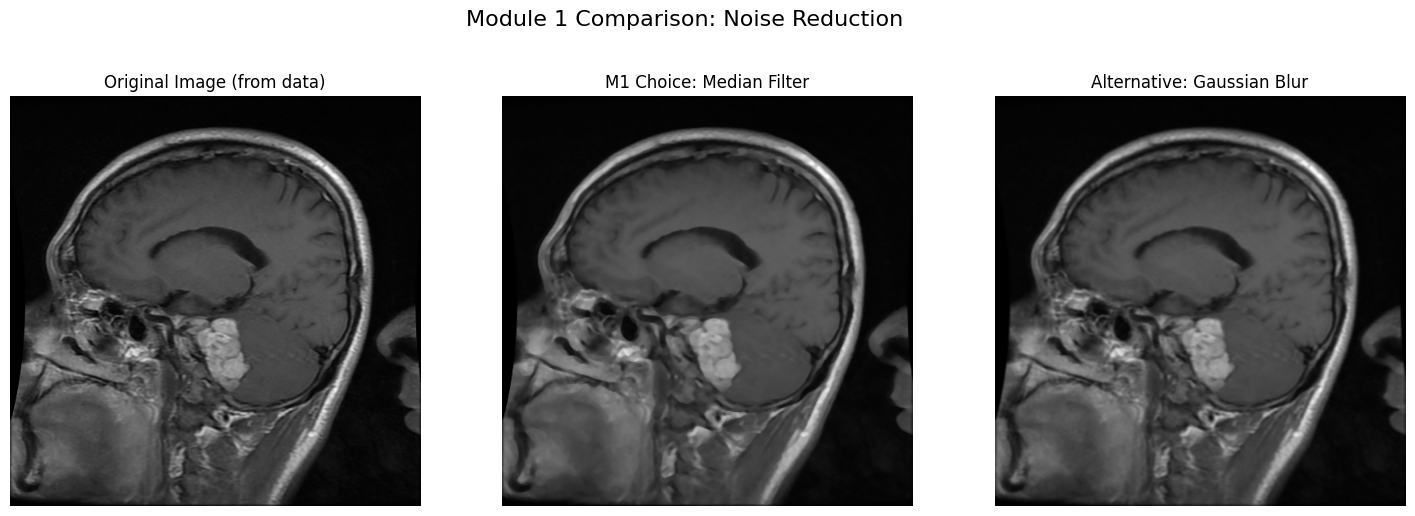

In [6]:
TUMOR_TYPE = 'Glioma'
EXAMPLE_FILE = '2569.png'

original_img_path = os.path.join(input_folder, TUMOR_TYPE, EXAMPLE_FILE)

original_img = cv2.imread(original_img_path, 0)

if original_img is not None:
    print("Running Module 1 Comparison (Median vs. Gaussian)...")

    # 1. Your M1 Choice
    median_filtered = cv2.medianBlur(original_img, 5)

    # 2. Alternative
    gaussian_blurred = cv2.GaussianBlur(original_img, (5, 5), 0)

    # Plotting
    fig1, axes1 = plt.subplots(1, 3, figsize=(18, 6))
    fig1.suptitle('Module 1 Comparison: Noise Reduction', fontsize=16)

    axes1[0].imshow(original_img, cmap='gray')
    axes1[0].set_title('Original Image (from data)')
    axes1[0].axis('off')

    axes1[1].imshow(median_filtered, cmap='gray')
    axes1[1].set_title('M1 Choice: Median Filter')
    axes1[1].axis('off')

    axes1[2].imshow(gaussian_blurred, cmap='gray')
    axes1[2].set_title('Alternative: Gaussian Blur')
    axes1[2].axis('off')

    plt.show()
else:
    print(f"M1 Comparison Error: Could not load original image at: {original_img_path}")

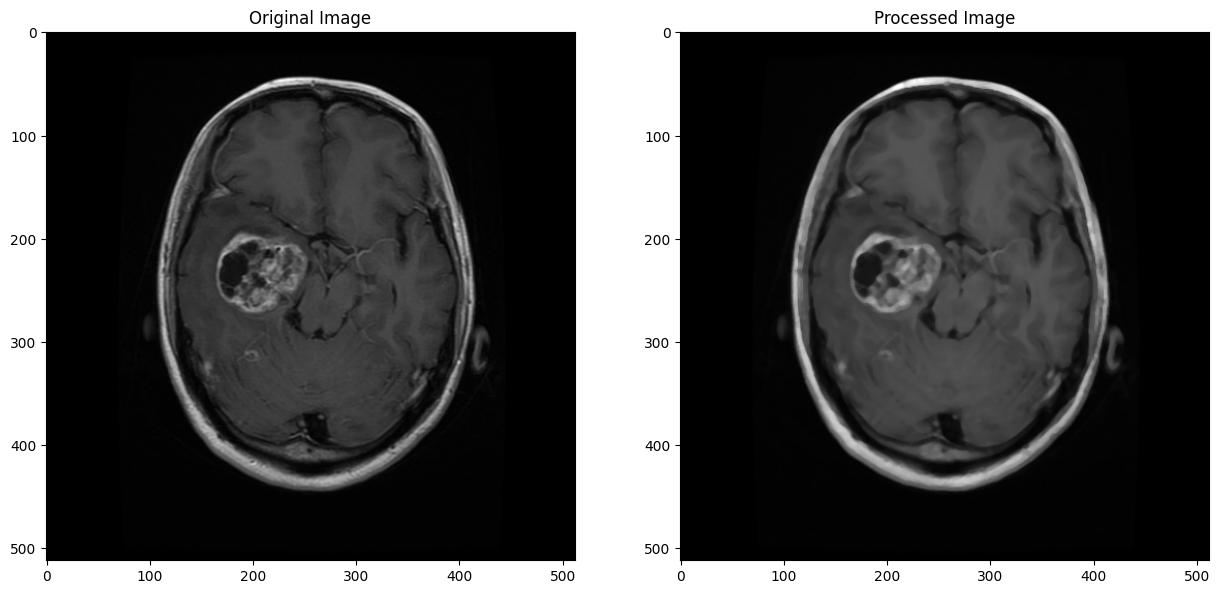

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(15,10))

# Read the images using cv2
original_img = cv2.imread('/content/data/data/Glioma/1841.png', 0)
processed_img = cv2.imread('/content/data/data/Output/Glioma/1841.png', 0)

# Check if images were read successfully
if original_img is not None:
    ax[0].imshow(original_img, cmap='gray')
    ax[0].set_title('Original Image')
else:
    ax[0].set_title('Original Image (Error loading)')
    print("Error loading original image.")

if processed_img is not None:
    ax[1].imshow(processed_img, cmap='gray')
    ax[1].set_title('Processed Image')
else:
    ax[1].set_title('Processed Image (Error loading)')
    print("Error loading processed image.")


plt.show()

In [8]:
import shutil
import os

output_folder = '/content/data/data/Output'
zip_output_path = '/content/processed_images.zip'

# Create a zip archive of the output folder
shutil.make_archive(zip_output_path.replace('.zip', ''), 'zip', output_folder)

print(f"✅ Zipped folder '{output_folder}' to '{zip_output_path}'")

✅ Zipped folder '/content/data/data/Output' to '/content/processed_images.zip'
